# Hierarchical Clustering

Hierarchical clustering, also referred to as hierarchical cluster analysis (HCA) is a common algorithm used to group data points with similar attributes. It is able to cluster data using two approaches: agglomerative (bottom-up) and divisive (top-down), shown below.

![fig1](../img/hca.png)

For the purpose of this notebook we will focus on the agglomerative approach. This method treats all data points as individual clusters initially. Larger clusters are then built by calculating the distance between each data point, merging the two closest each time until the desired number of clusters have been achieved.

The kdb+/q implementation of HCA uses euclidean distance metrics and centroid linkage methods to find clusters within data. Additionally, a kd-tree has been used to store the data points, their respective distances and their relative positions in the tree-structure.

### Requirements

The technical dependencies required to run this notebook are as follows:

    - embedPy
    - Matplotlib 2.1.1

### Load HCA

Below loads in the HCA algorithm defined in `hca.q`. The script `kdtree.q` is also used, called within the HCA script. EmbedPy has also been used below to import `matplotlib.pyplot` to visualise the data and resulting clusters.

In [1]:
\l clust.q
plt:.p.import`matplotlib.pyplot

In [2]:
plot:{
 subplots::plt[`:subplots][3;4];
 fig::subplots[@;0];
 axarr::subplots[@;1];
 fig[`:set_size_inches;18.5;10.5];
 {[d;c;f;i] 
  r:.clust.hc[d;c;] . f;
  j:cross[til 3;til 4]i;
  box:axarr[@;j 0][@;j 1];
  {x[`:scatter][;]. flip y}[box]each $[f[1]in `centroid`single;d distinct exec clustIdx from r where valid;exec rep by clust from r];
  box[`:set_title]"Distance/Linkage:",string[f 0],"/",string f 1;
  }[x;y]'[z;til 12];
 plt[`:show][];
 }


### Example 1

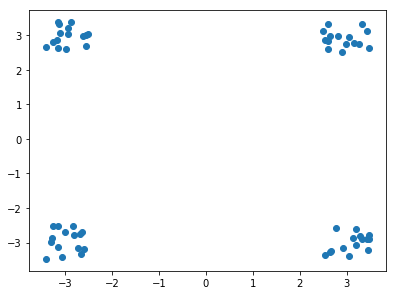

In [2]:
d1:(60#"F";",")0:`:../data/ss5.csv
plt[`:scatter][;]. flip d1;
plt[`:show][];

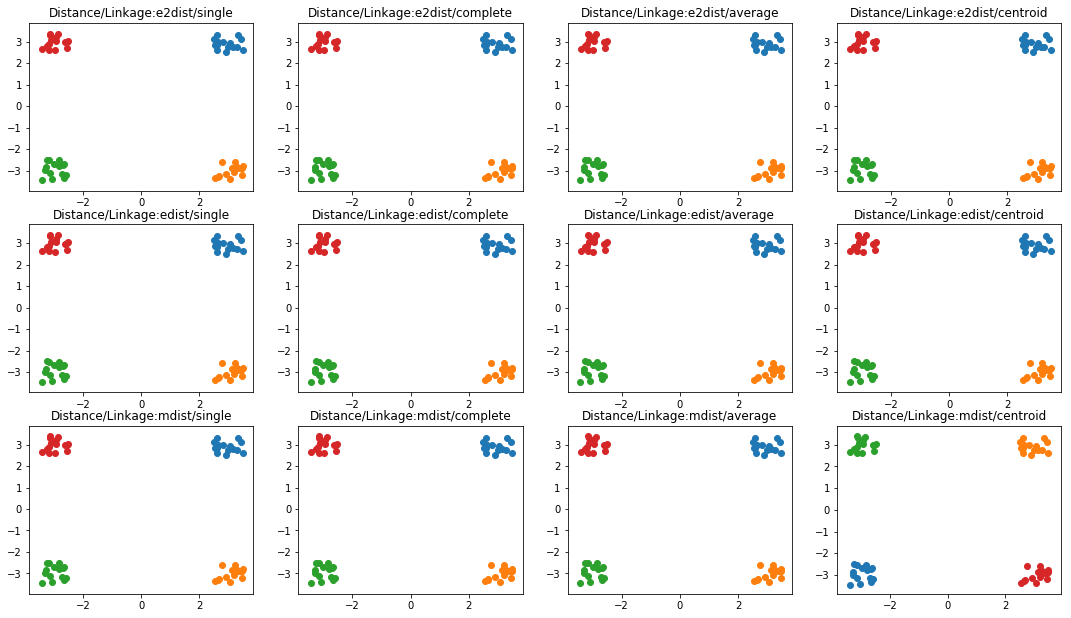

In [4]:
plot[d1;4;-4_cross[key .clust.dd;key .clust.ld]];

46 34400


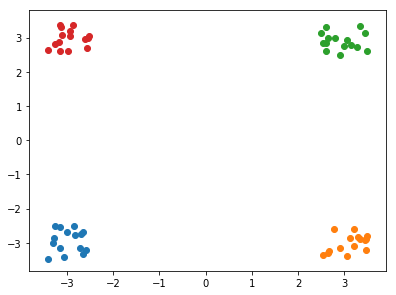

In [5]:
\ts r1:.clust.hc[d1;4;`e2dist;`centroid]
{plt[`:scatter][;]. flip x}each d1 distinct exec cltidx from r1 where valid;
plt[`:show][];

86 57920


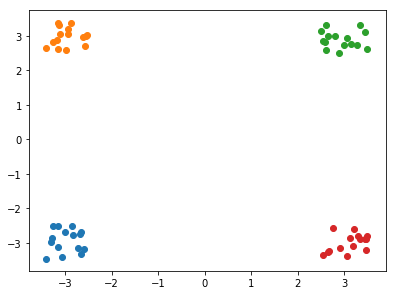

In [4]:
\ts r1:.clust.cure[d1;4;5;0;`e2dist]
{plt[`:scatter][;]. flip x}each d1 distinct exec cltidx from r1 where valid;
plt[`:show][];

### Example 2

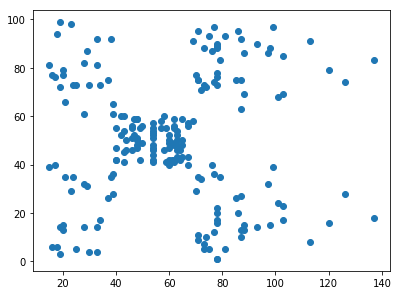

In [6]:
d2:("SSFFF";(),",")0:`:../data/cust.csv
d2:flip d2`Income`SpendingScore
plt[`:scatter][;]. flip d2;
plt[`:show][];

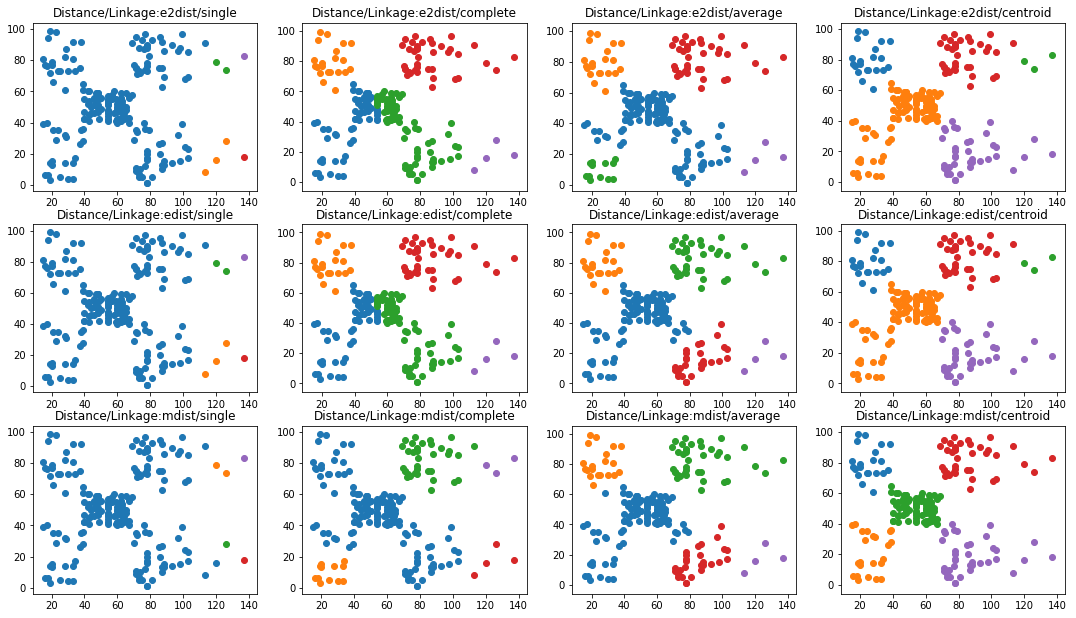

In [8]:
plot[d2;5;-4_cross[key .clust.dd;key .clust.ld]];

144 120816


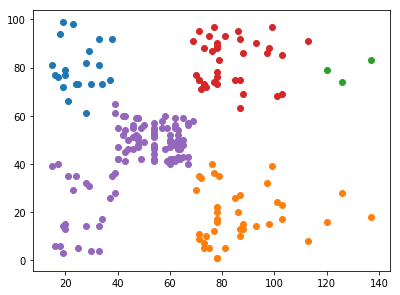

In [8]:
\ts r2:.clust.hc[d2;5;`e2dist;`centroid]
{plt[`:scatter][;]. $[2<count raze x;flip x;flip enlist x]}each d2 distinct exec cltidx from r2 where valid;
plt[`:show][];

519 145216


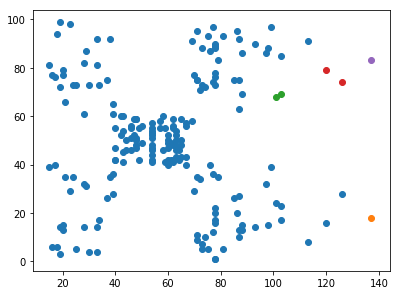

In [7]:
\ts r2:.clust.cure[d2;5;10;0;`e2dist]
{plt[`:scatter][;]. $[2<count raze x;flip x;flip enlist x]}each d2 distinct exec cltidx from r2 where valid;
plt[`:show][];

### Example 3

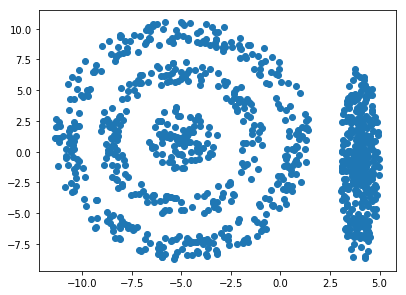

In [9]:
datapts:1000
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[datapts&count data]?count data
d3:data
plt[`:scatter][;]. flip d3;
plt[`:show][];

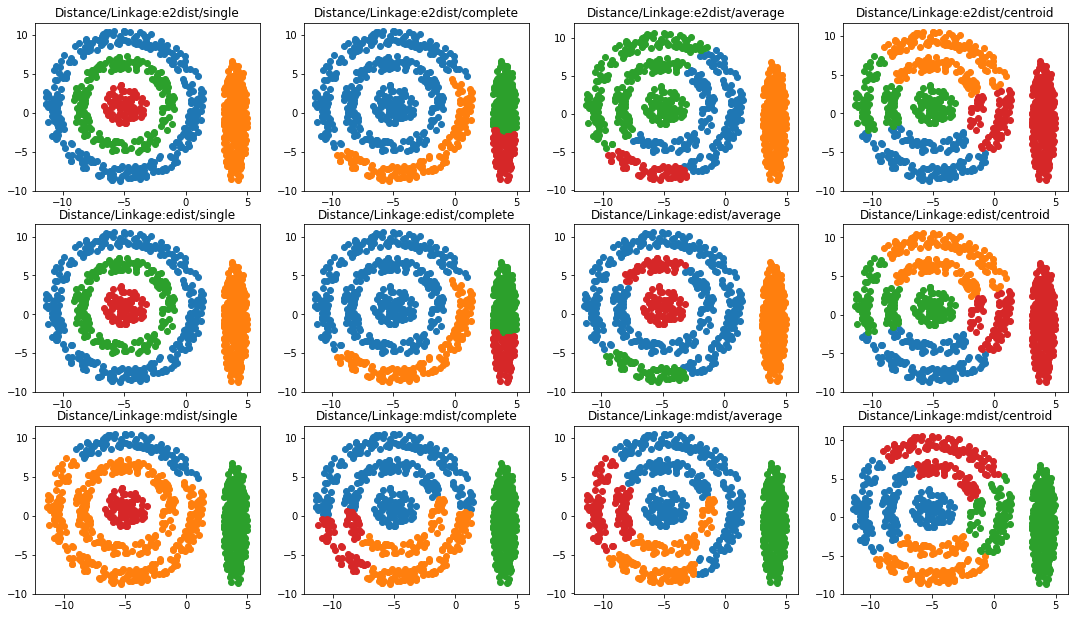

In [12]:
plot[d3;4;-4_cross[key .clust.dd;key .clust.ld]];

8357 4385552


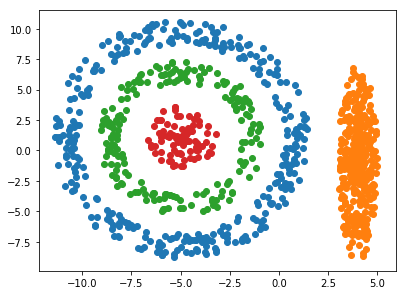

In [11]:
\ts r3:.clust.hc[d3;4;`e2dist;`single]
{plt[`:scatter][;]. $[2<count raze x;
 flip x;flip enlist x]}each d3 distinct exec cltidx from r3 where valid;
plt[`:show][];

7452 950736


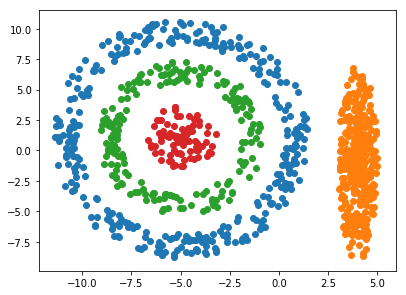

In [12]:
\ts r3:.clust.cure[d3;4;30;0;`e2dist]
{plt[`:scatter][;]. $[2<count raze x;
 flip x;flip enlist x]}each d3 distinct exec cltidx from r3 where valid;
plt[`:show][];

### Example 4

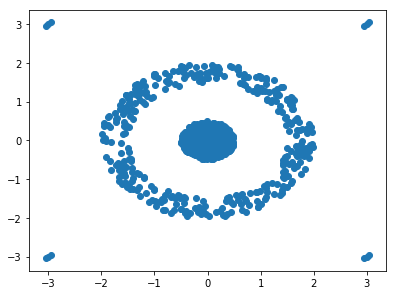

In [15]:
fcps:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
read:.p.import[`pyclustering.utils]`:read_sample
d4:read[fcps`:SAMPLE_TARGET]`
plt[`:scatter][;]. flip d4;
plt[`:show][];

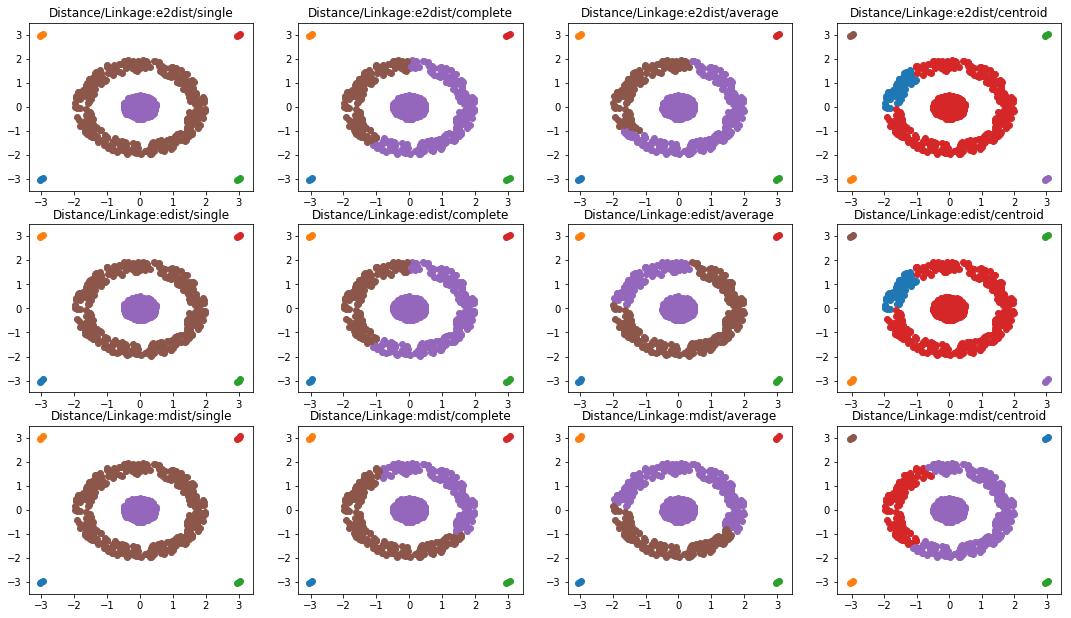

In [16]:
plot[d4;6;-4_cross[key .clust.dd;key .clust.ld]];

639 163744


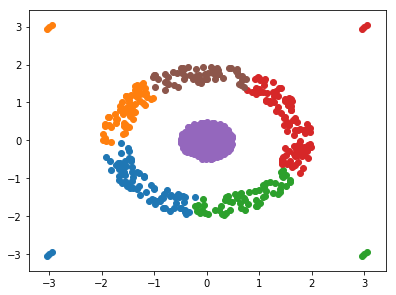

In [18]:
\ts r4:.clust.hc[d4;6;`e2dist;`ward]
{plt[`:scatter][;]. flip x}each d4 exec ind by clust from r4;
plt[`:show][];

3388 1944528


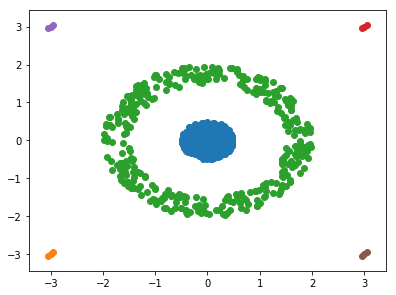

In [19]:
\ts r4:.clust.cure[d4;6;30;0]
{plt[`:scatter][;]. flip x}each d4 distinct exec clustIdx from r4 where valid;
plt[`:show][];

### Example 5 - 3D

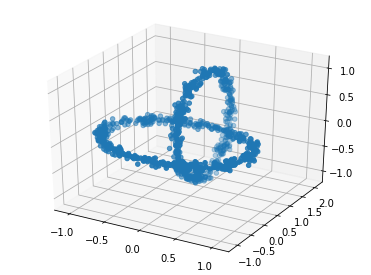

In [20]:
d5:read[fcps`:SAMPLE_CHAINLINK]`
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][;;]. flip d5;
plt[`:show][];

In [21]:
plot3D:{
 fig::plt[`:figure][];
 fig[`:set_size_inches;18.5;10.5];
 {[d;c;f;i]
  ax:fig[`:add_subplot][3;4;i+1;`projection pykw"3d"];
  r:.clust.hc[d;c;] . f;
  {x[`:scatter][;;]. flip y}[ax]each $[f[1]in `centroid`single;d distinct exec clustIdx from r where valid;exec rep by clust from r];
  ax[`:set_title]string[f 0],"/",string f 1;
  }[x;y]'[z;til 12];
 plt[`:show][];
 }

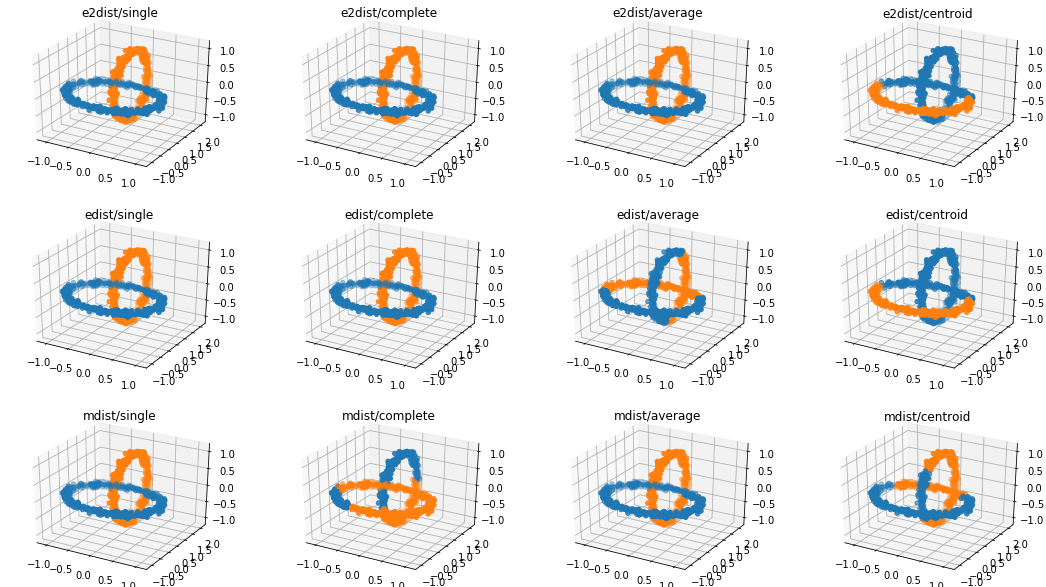

In [22]:
plot3D[d5;2;-4_cross[key .clust.dd;key .clust.ld]];

1142 206784


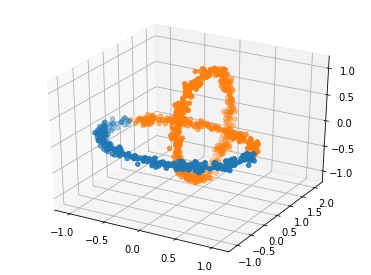

In [23]:
\ts r5:.clust.hc[d5;2;`e2dist;`ward]
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
{ax[`:scatter][;;]. flip x}each d5 exec ind by clust from r5;
plt[`:show][];

5723 3420816


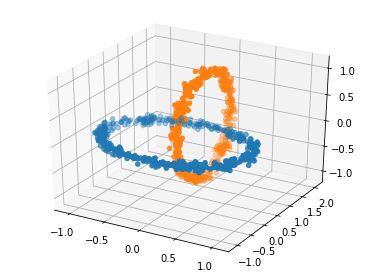

In [24]:
\ts r5:.clust.cure[d5;2;30;0]
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
{ax[`:scatter][;;]. flip x}each d5 distinct exec clustIdx from r5 where valid;
plt[`:show][];